Set phenotype name (the name of tsv file), restart and rerun the whole notebook

In [137]:
phenotype_name = "filter_ukbb_ef_ratio"

By re-running this notebook you will get the following files: 

* results.csv 
* PythonPlot.png
* Rplot.png
* Rplot.pdf

Check the results in the folder "I:/UKB_DATA/results/PheWas_{phenotype_name}/"

# PheWas and Data Manipulation

Import libraries and map

In [1]:
import pandas as pd
import numpy as np
from phemap import Phemap
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns
import math
from tabulate import tabulate
import os

ModuleNotFoundError: No module named 'tabulate'

In [139]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [140]:
def normalise(x):
    return (x - np.mean(x)) / np.std(x)

In [141]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

## Add age and gender

In [142]:
col_list = ["eid",
            "31-0.0",
            "21003-0.0",
            "22420-2.0",
            "22420-3.0",
            "22421-2.0",
            "22421-3.0",
            "22422-2.0",
            "22422-3.0"]

df = pd.read_csv("I:/UKB_DATA/main_df/ukb45494.csv", usecols=col_list)
# read eid '31-0.0' '21003-0.0'
df = df.rename(columns={"31-0.0":"sex",
                        "21003-0.0":"age",
                        "eid":"idx",
                        "22420-2.0":"EF1",
                        "22420-3.0":"EF2",
                        "22421-2.0":"LVED1",
                       "22421-3.0":"LVED2",
                       "22422-2.0":"LVES1",
                       "22422-3.0":"LVES2"})

In [143]:
imaging=pd.read_csv(f"I:/UKB_DATA/tsv_pheno/{phenotype_name}.tsv", sep='\t',index_col=0)
imaging = imaging.loc[:, ~imaging.columns.str.contains('^Unnamed')]
#imaging['hw']=imaging['pheno']

In [144]:
imaging = imaging.merge(df,on='idx')

In [145]:
imaging 

,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,77.352526,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991,1.0,44.0,52.0,NaN,130.0,NaN,62.0,NaN
1,1000243,54.248591,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770,1.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1000262,54.112948,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791,0.0,58.0,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,43.082690,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878,0.0,60.0,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,60.138734,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990,1.0,66.0,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44632,6017060,59.168483,126.252198,67.083715,0.531347,39.337849,120.907289,81.569440,0.674645,0.787595,0.0,61.0,62.0,NaN,116.0,NaN,44.0,NaN
44633,6017173,53.554437,122.153040,68.598603,0.561579,58.901144,114.028142,55.126998,0.483451,1.161606,0.0,44.0,53.0,NaN,129.0,NaN,61.0,NaN
44634,6017200,97.859497,189.676182,91.816685,0.484071,63.560160,155.972616,92.412456,0.592492,0.817009,1.0,49.0,58.0,NaN,136.0,NaN,57.0,NaN
44635,6017228,65.977289,144.125311,78.148022,0.542223,45.806214,136.942025,91.135811,0.665507,0.814752,0.0,62.0,60.0,NaN,130.0,NaN,52.0,NaN


In [146]:
imaging.to_csv("hw_sex_age.csv",index=False)

# PheWas

Read non-imaging phenotypes

In [2]:
with open(r"patient_diag", "rb") as input_file:
    non_imaging = pickle.load(input_file)
len(non_imaging)

502461

In [8]:
for idx in tqdm(non_imaging):
    if '426.92' in non_imaging[idx]:
        print("AHH")


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502461/502461 [00:00<00:00, 1992421.79it/s]


In [148]:
non_imaging

{1000012: ['174.11',
  '198.2',
  '198.2',
  '280.1',
  '272.1',
  '495.0',
  '495.0',
  '530.1',
  '530.14',
  '530.11',
  '535.0',
  '555.21',
  '939.0',
  '733.0',
  '756.5',
  '532.0',
  '1019.0',
  '850.0',
  '1015.0',
  '564.9',
  '965.1',
  '175.0'],
 1000029: ['272.11',
  '401.1',
  '411.2',
  '411.4',
  '470.0',
  '473.0',
  '550.1',
  '477.0',
  '512.8',
  '1019.0',
  '197.0'],
 1000031: ['455.0'],
 1000047: ['366.0', '550.4', '418.0'],
 1000050: ['285.0', '714.1', '740.1', '418.0', '418.0', '960.2'],
 1000068: ['174.11',
  '174.11',
  '285.0',
  '250.0',
  '250.2',
  '300.13',
  '362.2',
  '362.29',
  '474.2',
  '497.0',
  '496.0',
  '495.0',
  '521.1',
  '530.11',
  '531.2',
  '531.3',
  '211.0',
  '550.5',
  '550.0',
  '550.2',
  '947.0',
  '785.0',
  '532.0',
  '174.11',
  '306.0',
  '175.0',
  '990.0'],
 1000073: [],
 1000085: ['208.0', '562.1', '562.1', '208.0', '459.9', '564.9'],
 1000094: [],
 1000101: ['208.0', '565.1', '208.0', '704.0', '706.2', '1009.0'],
 1000119:

Read imaging phenotypes

In [149]:
imaging = pd.read_csv("hw_sex_age.csv")
len(imaging)

44637

Filter the patients for imaging and non-imaging

Contract Ids

In [150]:
relevant_ids = np.array(imaging['idx'])

Contracted array

## Exclude imaging phenotypes that are abnormal
* LVEF 48 - 70% 
* LVEDV 88 - 218
* LVESV 31 - 97

In [151]:
imaging['LVED1'] = imaging['LVED1'].fillna(90)
imaging['LVED2'] = imaging['LVED2'].fillna(90)

In [152]:
imaging=imaging.fillna(60)

In [153]:
imaging

,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,77.352526,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
1,1000243,54.248591,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770,1.0,59.0,60.0,60.0,90.0,90.0,60.0,60.0
2,1000262,54.112948,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,43.082690,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,60.138734,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44632,6017060,59.168483,126.252198,67.083715,0.531347,39.337849,120.907289,81.569440,0.674645,0.787595,0.0,61.0,62.0,60.0,116.0,90.0,44.0,60.0
44633,6017173,53.554437,122.153040,68.598603,0.561579,58.901144,114.028142,55.126998,0.483451,1.161606,0.0,44.0,53.0,60.0,129.0,90.0,61.0,60.0
44634,6017200,97.859497,189.676182,91.816685,0.484071,63.560160,155.972616,92.412456,0.592492,0.817009,1.0,49.0,58.0,60.0,136.0,90.0,57.0,60.0
44635,6017228,65.977289,144.125311,78.148022,0.542223,45.806214,136.942025,91.135811,0.665507,0.814752,0.0,62.0,60.0,60.0,130.0,90.0,52.0,60.0


In [154]:
exclude = (np.array(imaging['EF1'])<48) | \
(np.array(imaging['EF1'])>70) | \
(np.array(imaging['EF2'])<48) | \
(np.array(imaging['EF2'])>70) | \
(np.array(imaging['LVED1'])<88) | \
(np.array(imaging['LVED1'])>218) | \
(np.array(imaging['LVED2'])<88) | \
(np.array(imaging['LVED2'])>218) | \
(np.array(imaging['LVES1'])<31) | \
(np.array(imaging['LVES1'])>93) | \
(np.array(imaging['LVES2'])<31) | \
(np.array(imaging['LVES2'])>93)

In [155]:
# imaging = imaging[~exclude]

In [156]:
imaging

,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,77.352526,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
1,1000243,54.248591,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770,1.0,59.0,60.0,60.0,90.0,90.0,60.0,60.0
2,1000262,54.112948,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,43.082690,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,60.138734,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44632,6017060,59.168483,126.252198,67.083715,0.531347,39.337849,120.907289,81.569440,0.674645,0.787595,0.0,61.0,62.0,60.0,116.0,90.0,44.0,60.0
44633,6017173,53.554437,122.153040,68.598603,0.561579,58.901144,114.028142,55.126998,0.483451,1.161606,0.0,44.0,53.0,60.0,129.0,90.0,61.0,60.0
44634,6017200,97.859497,189.676182,91.816685,0.484071,63.560160,155.972616,92.412456,0.592492,0.817009,1.0,49.0,58.0,60.0,136.0,90.0,57.0,60.0
44635,6017228,65.977289,144.125311,78.148022,0.542223,45.806214,136.942025,91.135811,0.665507,0.814752,0.0,62.0,60.0,60.0,130.0,90.0,52.0,60.0


### Delete Ids from non_imaging that are  present in imaging

In [157]:
data = list(non_imaging.items())
non_imaging_ids = np.array(data)[:,0]

<ipython-input-157-0d5b0cda13c8>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  non_imaging_ids = np.array(data)[:,0]


In [158]:
imaging_ids = np.array(imaging['idx'])

In [159]:
keep_ids = np.intersect1d(imaging_ids,non_imaging_ids)

In [160]:
non_imaging_filtered = { idx: non_imaging[idx] for idx in keep_ids }

In [161]:
non_imaging=non_imaging_filtered

In [162]:
imaging=imaging[imaging['idx'].isin(keep_ids)]

In [163]:
len(imaging)

44635

In [164]:
len(non_imaging_filtered)

44635

Normalize and adjust for confounding factors

In [165]:
imaging

,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,77.352526,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
1,1000243,54.248591,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770,1.0,59.0,60.0,60.0,90.0,90.0,60.0,60.0
2,1000262,54.112948,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,43.082690,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,60.138734,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44632,6017060,59.168483,126.252198,67.083715,0.531347,39.337849,120.907289,81.569440,0.674645,0.787595,0.0,61.0,62.0,60.0,116.0,90.0,44.0,60.0
44633,6017173,53.554437,122.153040,68.598603,0.561579,58.901144,114.028142,55.126998,0.483451,1.161606,0.0,44.0,53.0,60.0,129.0,90.0,61.0,60.0
44634,6017200,97.859497,189.676182,91.816685,0.484071,63.560160,155.972616,92.412456,0.592492,0.817009,1.0,49.0,58.0,60.0,136.0,90.0,57.0,60.0
44635,6017228,65.977289,144.125311,78.148022,0.542223,45.806214,136.942025,91.135811,0.665507,0.814752,0.0,62.0,60.0,60.0,130.0,90.0,52.0,60.0


In [166]:
conf = np.stack((imaging['sex'], imaging['age']), axis=1)
conf = (conf - np.mean(conf, axis=0)) / np.std(conf, axis=0)

In [167]:
n_row = conf.shape[1]
n_col = imaging.shape[1]
beta = np.zeros((n_row, n_col))
i=1
x = imaging.iloc[:, i]
beta[:, i] = np.dot(np.linalg.pinv(conf), x)
x = x - np.dot(conf, beta[:, i])
x = normalise(x)
imaging.iloc[:, i] = x

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [168]:
imaging

,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,-0.052169,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
1,1000243,-1.083687,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770,1.0,59.0,60.0,60.0,90.0,90.0,60.0,60.0
2,1000262,0.467574,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,-0.184696,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,-0.485575,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44632,6017060,0.887798,126.252198,67.083715,0.531347,39.337849,120.907289,81.569440,0.674645,0.787595,0.0,61.0,62.0,60.0,116.0,90.0,44.0,60.0
44633,6017173,-0.002056,122.153040,68.598603,0.561579,58.901144,114.028142,55.126998,0.483451,1.161606,0.0,44.0,53.0,60.0,129.0,90.0,61.0,60.0
44634,6017200,1.430438,189.676182,91.816685,0.484071,63.560160,155.972616,92.412456,0.592492,0.817009,1.0,49.0,58.0,60.0,136.0,90.0,57.0,60.0
44635,6017228,1.359621,144.125311,78.148022,0.542223,45.806214,136.942025,91.135811,0.665507,0.814752,0.0,62.0,60.0,60.0,130.0,90.0,52.0,60.0


Patients filtered now

In [169]:
all_codes=phemap.get_all_phecodes()

In [170]:
all_phe_codes=[]

In [171]:
for i in range(len(all_codes)):
    all_phe_codes.append(all_codes[i]['phecode'])

In [172]:
PheWasDic = {}
PheWasDic['idx'] = np.array(imaging['idx'])
PheWasDic['pheno'] = np.array(imaging['pheno'])

In [173]:
for phecode in all_phe_codes:
    diagnosed = []
    for patient in non_imaging:
        if (phecode in non_imaging[patient]):
            diagnosed.append(1)
        else:
            diagnosed.append(0)  
    PheWasDic[phecode] = np.array(diagnosed)

In [174]:
PheWasDic

{'idx': array([1000158, 1000243, 1000262, ..., 6017200, 6017228, 6017343],
       dtype=int64),
 'pheno': array([0.73099124, 1.04277021, 1.02779149, ..., 0.81700865, 0.81475196,
        0.97096613]),
 '008': array([0, 0, 0, ..., 0, 0, 0]),
 '008.5': array([0, 0, 0, ..., 0, 0, 0]),
 '008.51': array([0, 0, 0, ..., 0, 0, 0]),
 '008.52': array([0, 0, 0, ..., 0, 0, 0]),
 '008.6': array([0, 0, 0, ..., 0, 0, 0]),
 '008.7': array([0, 0, 0, ..., 0, 0, 0]),
 '010': array([0, 0, 0, ..., 0, 0, 0]),
 '031': array([0, 0, 0, ..., 0, 0, 0]),
 '031.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038': array([0, 0, 0, ..., 0, 0, 0]),
 '038.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038.2': array([0, 0, 0, ..., 0, 0, 0]),
 '038.3': array([0, 0, 0, ..., 0, 0, 0]),
 '041': array([0, 0, 0, ..., 0, 0, 0]),
 '041.1': array([0, 0, 0, ..., 0, 0, 0]),
 '041.11': array([0, 0, 0, ..., 0, 0, 0]),
 '041.12': array([0, 0, 0, ..., 0, 0, 0]),
 '041.2': array([0, 0, 0, ..., 0, 0, 0]),
 '041.21': array([0, 0, 0, ..., 0, 0, 0]),
 '041.4

In [175]:
dfp =pd.DataFrame.from_dict(PheWasDic)

In [176]:
dfp.to_csv("phewas.csv")

In [177]:
dfp

,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,031,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,1000158,0.730991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000243,1.042770,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000262,1.027791,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000369,0.998878,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000489,0.875990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44630,6017060,0.787595,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44631,6017173,1.161606,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44632,6017200,0.817009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44633,6017228,0.814752,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Table structure:
eid___hw___phenocode1___phenocode2.....
eid, float,

## Perform PheWas

In [178]:
phe_table = pd.read_csv("phewas.csv")

In [179]:
phe_table

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,0,1000158,0.730991,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1000243,1.042770,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000262,1.027791,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1000369,0.998878,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1000489,0.875990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44630,44630,6017060,0.787595,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44631,44631,6017173,1.161606,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44632,44632,6017200,0.817009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44633,44633,6017228,0.814752,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Additional quant traits are:
* systolic_pressure
* diastolic_pressure
* pulse_rate

In [180]:
quant_traits=pd.read_csv("quant_traits.csv")

In [181]:
quant_traits

,idx,systolic_pressure,diastolic_pressure,pulse_rate
0,1000012,138.0,68.0,72.0
1,1000158,153.0,95.0,68.0
2,1000262,130.0,73.0,71.0
3,1000369,141.0,83.0,80.0
4,1000489,145.0,89.0,66.0
...,...,...,...,...
31711,6024290,132.0,85.0,62.0
31712,6024323,122.0,65.0,75.0
31713,6024624,NaN,NaN,NaN
31714,6024638,136.0,94.0,69.0


In [182]:
phe_table = pd.merge(phe_table,quant_traits, on ='idx')

In [183]:
phe_table
#    temp = phe_table[['pheno', phecode]].dropna()

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,989,990,994,994.1,994.2,994.21,996,systolic_pressure,diastolic_pressure,pulse_rate
0,0,1000158,0.730991,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,153.0,95.0,68.0
1,2,1000262,1.027791,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,130.0,73.0,71.0
2,3,1000369,0.998878,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,141.0,83.0,80.0
3,4,1000489,0.875990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145.0,89.0,66.0
4,6,1000542,0.931241,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31254,44626,6016866,0.915207,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,144.0,94.0,68.0
31255,44629,6017045,1.080608,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,140.0,80.0,62.0
31256,44630,6017060,0.787595,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
31257,44631,6017173,1.161606,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,127.0,86.0,70.0


Normalize

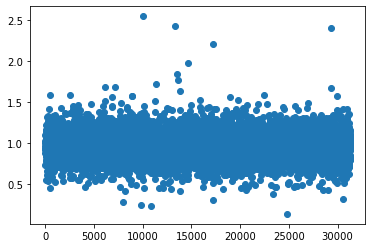

In [184]:
plt.scatter(np.arange(len(phe_table['pheno'])),phe_table['pheno'])

# PERFORM THE ASSOCIATION

In [185]:
results = {}

In [186]:
results['phecode'] = np.array(phe_table.columns[3:])

In [187]:
ccs = []
p_vals = []
for phecode in phe_table.columns[3:]:
    temp = phe_table[['pheno', phecode]].dropna()
    cc, p_val = scipy.stats.pearsonr(temp['pheno'], temp[phecode])
    ccs.append(cc)
    p_vals.append(p_val)
    
results['ccs']=ccs
results['p_vals']=p_vals

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [188]:
results = pd.DataFrame.from_dict(results)

Drop Nans

In [189]:
results = results.dropna()

In [190]:
results

,phecode,ccs,p_vals
64,110.1,-0.002419,6.688861e-01
65,110.11,-0.007040,2.132301e-01
66,110.12,-0.008855,1.174647e-01
67,110.13,0.000011,9.984305e-01
71,112.3,0.005520,3.290644e-01
...,...,...,...
1843,972.2,0.005331,3.459551e-01
1863,994.2,0.011827,3.652212e-02
1866,systolic_pressure,0.059151,5.747319e-24
1867,diastolic_pressure,0.024103,3.941445e-05


In [191]:
log_corr_p = - np.log10(results['p_vals'])

In [192]:
log_corr_p

64       0.174648
65       0.671151
66       0.930092
67       0.000682
71       0.482719
          ...    
1843     0.460980
1863     1.437444
1866    23.240535
1867     4.404345
1868    12.025817
Name: p_vals, Length: 961, dtype: float64

In [193]:
results['log_cor']=log_corr_p

In [194]:
results.to_csv("hw_phewas_results.csv",index=False)

# Analyze and Plot


Bonferroni correction

In [195]:
results=pd.read_csv("hw_phewas_results.csv")

In [196]:
len(results)

961

In [197]:
p_bonf = 0.05 / len(phemap.get_all_phecodes())

In [198]:
p_bonf

2.679528403001072e-05

In [199]:
print('Number of correlations reaching Bonferroni threshold = {0}'.format(np.sum(results['p_vals'] < p_bonf)))

Number of correlations reaching Bonferroni threshold = 12


In [200]:
relevant = np.array(results[results['p_vals']<p_bonf])

In [201]:
relevant

array([['204.21', 0.026111175528930868, 3.891126338791465e-06,
        5.409924668104191],
       ['394.2', 0.024871042893549085, 1.093747315976828e-05,
        4.96108299971398],
       ['411.2', 0.051841243344430035, 4.667259545207537e-20,
        19.33093804742913],
       ['411.4', 0.03390738320899419, 2.017613416909141e-09,
        8.695162042750459],
       ['411.8', 0.03137122851284413, 2.895444077923705e-08,
        7.538284818533641],
       ['420.22', 0.033361906757393506, 3.6380320815019733e-09,
        8.43913347548753],
       ['425.1', 0.04283986675064627, 3.5266783739102515e-14,
        13.452634145324035],
       ['426.32', 0.044486791776878164, 3.576545324057846e-15,
        14.446536266952979],
       ['427.42', 0.029868230184869133, 1.2796662187185837e-07,
        6.8929032946273265],
       ['428.2', 0.06648161064326333, 5.798840609000457e-32,
        31.236658828410416],
       ['systolic_pressure', 0.05915146625969848, 5.747318829806246e-24,
        23.24053470991

In [202]:
table = []
table.append(["PheCode", "CorCoef", "P_VAL"])
for p in relevant:
    try:
        table.append([phemap.get_phecode_info(p[0])['phenotype'], p[1] ,p[2]])
    except:
        table.append([p[0], p[1] ,p[2]])


In [203]:
print(tabulate(table))

-------------------------------------------------  --------------------  ----------------------
PheCode                                            CorCoef               P_VAL
Myeloid leukemia, acute                            0.026111175528930868  3.891126338791465e-06
Mitral valve disease                               0.024871042893549085  1.093747315976828e-05
Myocardial infarction                              0.051841243344430035  4.667259545207537e-20
Coronary atherosclerosis                           0.03390738320899419   2.017613416909141e-09
Other chronic ischemic heart disease, unspecified  0.03137122851284413   2.895444077923705e-08
Chronic pericarditis                               0.033361906757393506  3.6380320815019733e-09
Primary/intrinsic cardiomyopathies                 0.04283986675064627   3.5266783739102515e-14
Left bundle branch block                           0.044486791776878164  3.576545324057846e-15
Cardiac arrest                                     0.0298682301

In [204]:
categories = []
for i in range(len(results)):
    try:
        categories.append(phemap.get_phecode_info(results['phecode'][i])['category'])
    except:
        categories.append("quant measurements")

In [205]:
results['categories']=categories
results.to_csv("hw_phewas_results.csv",index=False)

In [206]:
len(np.unique(results['categories']))

18

In [207]:
pal = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green','red','purple', 'orange', 
       'pink', 'blue',
      'blue','red']

In [208]:
results

,phecode,ccs,p_vals,log_cor,categories
0,110.1,-0.002419,6.688861e-01,0.174648,infectious diseases
1,110.11,-0.007040,2.132301e-01,0.671151,infectious diseases
2,110.12,-0.008855,1.174647e-01,0.930092,infectious diseases
3,110.13,0.000011,9.984305e-01,0.000682,infectious diseases
4,112.3,0.005520,3.290644e-01,0.482719,infectious diseases
...,...,...,...,...,...
956,972.2,0.005331,3.459551e-01,0.460980,injuries & poisonings
957,994.2,0.011827,3.652212e-02,1.437444,injuries & poisonings
958,systolic_pressure,0.059151,5.747319e-24,23.240535,quant measurements
959,diastolic_pressure,0.024103,3.941445e-05,4.404345,quant measurements


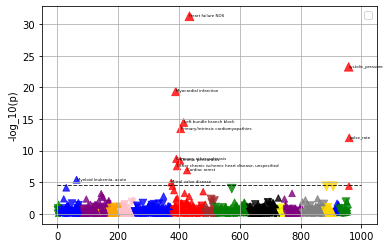

In [209]:
markers=["^","v"]
positive_cor = results[results['ccs']>0]
negative_cor = results[results['ccs']<0]
pal2=pal[:len(np.unique(negative_cor['categories']))]
pal1=pal[:len(np.unique(positive_cor['categories']))]
significant = results[results['p_vals']<p_bonf]
sns.scatterplot(x=positive_cor['phecode'].index, y=positive_cor['log_cor'], size=np.abs(positive_cor['ccs']),
                     hue=positive_cor['categories'],sizes=(30, 80), 
                     alpha=0.8, palette=pal1, marker="^", ec="face")
sns.scatterplot(x=negative_cor['phecode'].index, y=negative_cor['log_cor'], size=np.abs(negative_cor['ccs']), hue=negative_cor['categories'],
                     sizes=(30, 80), 
                     alpha=0.8, palette=pal2, marker="v", ec="face")

plt.plot([0, 1000], [-math.log10(p_bonf), -math.log10(p_bonf)], 'k--', linewidth=1, alpha=0.8)
for index, sig in significant.iterrows():
    try:
        name= phemap.get_phecode_info(sig['phecode'])['phenotype']
    except:
        name = sig['phecode']
        
    plt.text(x= index,
             y= sig['log_cor'],
             s = name,
             fontdict=dict(color='black',size=4)) 
    
plt.ylabel('-log_10(p)')
plt.legend([])
plt.grid()
## create dir if it doesn't exist
path = f'I:/UKB_DATA/results/PheWas_{phenotype_name}'

# Check whether the specified path exists or not
exists = os.path.exists(path)
if not exists:
    os.makedirs(path)
        
plt.savefig(os.path.join(path,"PythonPlot.png"),dpi=200)

In [210]:
results.at[len(results)-3,'phecode']="1000.1"
results.at[len(results)-2,'phecode']="1001.1"
results.at[len(results)-1,'phecode']="1002.1"
# adding one more string row so that R read it as string
onemore = {'phecode': 'one more', 'ccs': '0.01', 'p_vals':"0.1", 'log_cor': '0.1','categories':'quant measurement'}
results = results.append(onemore, ignore_index = True)

In [211]:
results.to_csv(os.path.join(path,"results.csv"),index=False)

In [212]:
import pandas as pd
pd.read_csv("results.csv")

,phecode,ccs,p_vals,log_cor,categories
0,110.1,0.001766,7.719740e-01,0.112397,infectious diseases
1,110.11,0.001709,7.791185e-01,0.108396,infectious diseases
2,110.12,0.004978,4.139232e-01,0.383080,infectious diseases
3,110.13,0.000664,9.132685e-01,0.039402,infectious diseases
4,112.3,0.002466,6.857161e-01,0.163856,infectious diseases
...,...,...,...,...,...
945,994.2,0.004331,4.771616e-01,0.321335,injuries & poisonings
946,1000.1,0.018721,3.034596e-03,2.517899,quant measurements
947,1001.1,0.020484,1.180933e-03,2.927775,quant measurements
948,1002.1,-0.042085,2.626957e-11,10.580547,quant measurements


In [213]:
#f = open("temp_pheno_name.txt", "w")
#f.write(phenotype_name)
#f.close()

In [214]:
!C:\Progra~1\R\R-4.0.3\bin\Rscript.exe ..\CoxMethod\Cox\PheWasPlot.R {phenotype_name}

[1] "I:/UKB_DATA/results/PheWas_filter_ukbb_ef_ratio"
[1] "character"
[1] 504 504
pdf 
  2 
pdf 
  2 


Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: parallel
Welcome to the new version of PheWAS. This version has many updates; please see https://github.com/PheWAS/PheWAS/tree/legacy for the legacy release if needed. Check ?PheWAS for more documentation
Warning messages:
1: package 'dplyr' was built under R version 4.0.5 
2: package 'tidyr' was built under R version 4.0.5 
3: package 'ggplot2' was built under R version 4.0.5 
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.1.7     v stringr 1.4.0
v purrr   0.3.4     v forcats 0.5.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks

## We want to visualize differences in {phenotype} among patients diagnosed with different cardiac outcomes (taken as ICD10 codes)

In [215]:
import pandas as pd
from utils import exclude_abnormal
import matplotlib.pyplot as plt
import numpy as np

In [216]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb47615.csv",sep='\t')

1. Identify phecode 
    * Cardiomyopathy 
    [425.0, 425.1, 425.11, 425.12, 425.2,425.8]
 
    * Atrial fibrillation
    [427.2, 427.21, 427.22]
    * Heart failures [427.4,
 427.42,]
    
    * Type 2 Diabetes 
   [250.2,
 250.21,
 250.22,
 250.23,
 250.24,
 250.25]
    * Hypertension 
[401.0, 401.1, 401.2, 401.21, 401.22, 401.3]

    * Chronic kidney disease 
[585.0,
 585.1,
 585.2,
 585.3,
 585.31,
 585.32,
 585.33,
 585.34,
 585.4]
    * Aortic valve disease	394‑399.99
[394.0,
 394.1,
 394.2,
 394.3,
 394.4,
 394.7,
 395.0,
 395.1,
 395.2,
 395.3,
 395.4,
 395.6]
    * Carditis [420.0, 420.1, 420.2, 420.21, 420.22, 420.3]
    * AV Node Distal Con disease
 [426.0, 426.2,426.21,426.22,426.23,426.24]
2. divide ids in the group and compute mean and std for all


In [217]:
cardiomyopathy = [425, 425.1, 425.11, 425.12, 425.2,425.8]
atrial_fib = [427.2, 427.21, 427.22]
heart_failures = [427.4, 427.42]
diabetes =  [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
hypertension = [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
chronic_kidney_disease = [585, 585.1, 585.2, 585.3, 585.31, 585.32, 585.33, 585.34, 585.4]
aortic_valve_disease = [394, 394.1, 394.2, 394.3, 394.4, 394.7, 395, 395.1, 395.2, 395.3, 395.4, 395.6]
carditis = [420, 420.1, 420.2, 420.21, 420.22, 420.3]
av_node = [426, 426.2,426.21,426.22,426.23,426.24]

In [218]:
normal = phe_table['pheno']

In [219]:
def get_pheno(phe_codes):
    phe_table=pd.read_csv("phewas.csv")
    df=pd.read_csv(f"I:/UKB_DATA/tsv_pheno/{phenotype_name}.tsv", sep='\t',index_col=0)
    phe_table.merge(df,on='idx')
    truth_values = phe_table[str(phe_codes[0])]
    for code in phe_codes: 
        truth_values |= phe_table[str(code)]
    phe_table = phe_table[np.array(truth_values,  dtype='bool')]
    return np.array(phe_table['idx']), np.array(phe_table['pheno'])

In [220]:
cardiomyopathy_ids, cardiomyopathy_pheno = get_pheno(cardiomyopathy)
artrial_fib_ids, atrial_fib_pheno = get_pheno(atrial_fib)
heart_failures_ids, heart_failures_pheno = get_pheno(heart_failures)
diabetes_ids, diabetes_pheno = get_pheno(diabetes)
hypertension_ids, hypertension_pheno = get_pheno(hypertension)
chronic_kidney_disease_ids, chronic_kidney_disease_pheno = get_pheno(chronic_kidney_disease)
aortic_valve_disease_ids, aortic_valve_disease_pheno = get_pheno(aortic_valve_disease)
carditis_ids, carditis_pheno = get_pheno(carditis)
av_node_ids, av_node_pheno = get_pheno(av_node)

In [221]:
abnormal = np.concatenate( (cardiomyopathy_ids,
                          artrial_fib_ids,
                          heart_failures_ids,
                          diabetes_ids,
                          hypertension_ids,
                          chronic_kidney_disease_ids,
                          aortic_valve_disease_ids, 
                          carditis_ids,
                          av_node_ids))


In [222]:
normal_pheno = np.array(phe_table[~ phe_table['idx'].isin(abnormal)]['pheno'])

Figure out how to get normal

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


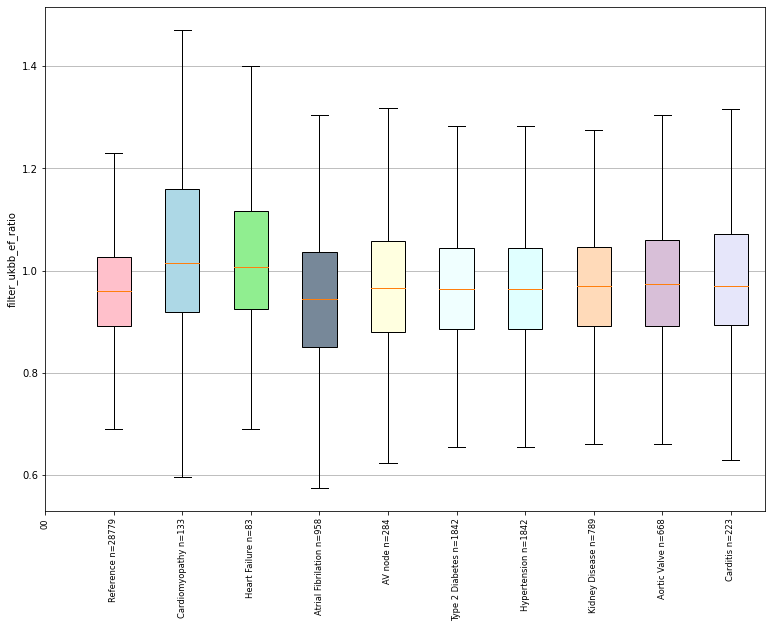

In [223]:
data = [normal_pheno, cardiomyopathy_pheno, heart_failures_pheno, atrial_fib_pheno, av_node_pheno, diabetes_pheno,hypertension_pheno, chronic_kidney_disease_pheno, aortic_valve_disease_pheno,carditis_pheno]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# plt.ylabel("Sphericity Index")
# plt.ylabel('Filtered LVEDV (CVAIR)')
plt.ylabel(f'{phenotype_name}')
# Creating plot
bp = ax.boxplot(data,showfliers=False,patch_artist=True,meanline=True)
t11 = ['00', f'Reference n={len(normal_pheno)}', f'Cardiomyopathy n={len(cardiomyopathy_pheno)}',
       f'Heart Failure n={len(heart_failures_pheno)}', f'Atrial Fibrilation n={len(atrial_fib_pheno)}',
       f'AV node n={len(av_node_pheno)}',  f'Type 2 Diabetes n={len(diabetes_pheno)}', f'Hypertension n={len(hypertension_pheno)}',
       f'Kidney Disease n={len(chronic_kidney_disease_pheno)}',f'Aortic Valve n={len(aortic_valve_disease_pheno)}',f'Carditis n={len(carditis_pheno)}']

ax.yaxis.grid(True)
colors = ['pink', 'lightblue', 'lightgreen', 'lightslategray', 'lightyellow', 'azure','lightcyan','peachpuff','thistle','lavender']
plt.xticks(range(len(t11)), t11, size='small',rotation='vertical')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
#plt.title("Differences in HW pheno")
# plt.savefig("diffplot")
path = f'I:/UKB_DATA/results/PheWas_{phenotype_name}'
plt.savefig(os.path.join(path,"diffplott.png"),dpi=200,bbox_inches='tight')

In [224]:
# import pandas as pd

In [225]:
# df

In [226]:
# df = pd.read_csv("I:/UKB_DATA/tsv_pheno/milos_esv_ratio.tsv",sep='\t')

In [227]:
# np.sum(np.isnan(df['pheno']))

In [228]:
# df.dropna().to_csv("I:/UKB_DATA/tsv_pheno/milos_esv_ratio.tsv", sep='\t',index =0)

In [229]:
# df